# Step 1: Setup

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [4]:
# import the dataset
from google.colab import files
upload = files.upload()

Saving GOOG.csv to GOOG.csv
Saving GOOG_train.csv to GOOG_train.csv
Saving GOOG_test.csv to GOOG_test.csv


In [5]:
train = pd.read_csv('/content/GOOG_train.csv')

In [6]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-10,57.848999,57.979500,57.479500,57.641998,57.641998,15968000
1,2018-07-11,57.229500,58.214500,57.049999,57.695000,57.695000,22400000
2,2018-07-12,57.994499,59.220501,57.796749,59.174000,59.174000,25038000
3,2018-07-13,59.250000,59.770851,59.000000,59.441002,59.441002,24438000
4,2018-07-16,59.469501,59.549999,58.964001,59.193001,59.193001,21114000


In [7]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-06-30,121.099998,122.029999,120.879997,120.970001,120.970001,23865800
1253,2023-07-03,120.320000,121.019997,119.705002,120.559998,120.559998,13888300
1254,2023-07-05,120.059998,123.370003,120.059998,122.629997,122.629997,17830300
1255,2023-07-06,120.639999,121.150002,119.250000,120.930000,120.930000,17732500
1256,2023-07-07,120.889999,121.750000,120.089996,120.139999,120.139999,20982400


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [9]:
train_set = train.iloc[:,1:2].values

In [10]:
train_set.shape, train.shape

((1257, 1), (1257, 7))

In [11]:
# Feature scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)

In [13]:
train_set

array([[ 57.848999],
       [ 57.2295  ],
       [ 57.994499],
       ...,
       [120.059998],
       [120.639999],
       [120.889999]])

In [16]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1257):
  x_train.append(train_set_scaled[i-60:i, 0])
  y_train.append(train_set_scaled[i,0])

# converting x_train & y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
x_train

array([[0.08872863, 0.0827239 , 0.09013894, ..., 0.10563785, 0.10952471,
        0.10519684],
       [0.0827239 , 0.09013894, 0.10230836, ..., 0.10952471, 0.10519684,
        0.11200125],
       [0.09013894, 0.10230836, 0.10443596, ..., 0.10519684, 0.11200125,
        0.10731473],
       ...,
       [0.55322118, 0.56892367, 0.56436801, ..., 0.69202324, 0.70181307,
        0.69425264],
       [0.56892367, 0.56436801, 0.56892367, ..., 0.70181307, 0.69425264,
        0.69173247],
       [0.56436801, 0.56892367, 0.56000624, ..., 0.69425264, 0.69173247,
        0.69735435]])

In [18]:
y_train

array([0.11200125, 0.10731473, 0.09382709, ..., 0.69173247, 0.69735435,
       0.69977757])

In [19]:
x_train.shape, y_train.shape

((1197, 60), (1197,))

In [21]:
# reshape the dataset
x_train = x_train.reshape(1197, 60, 1)

In [22]:
x_train.shape, y_train.shape

((1197, 60, 1), (1197,))

# Step 3: Building LSTM

In [23]:
# Define an object
model= tf.keras.models.Sequential()

In [24]:
# Adding the first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Adding the second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Adding the third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Adding the 4th LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [25]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step4: Training the Model

In [28]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 9s 125ms/step - loss: 0.0528
Epoch 2/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0075
Epoch 3/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0038
Epoch 13/100


# Step 5: Making the Predictions

In [31]:
# getting real stock prices of month Jun - july 2023, and 2022/23
test = pd.read_csv('/content/GOOG.csv')
test1 = pd.read_csv('/content/GOOG_test.csv')

In [32]:
test.info(), test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       18 non-null     object 
 1   Open       18 non-null     float64
 2   High       18 non-null     float64
 3   Low        18 non-null     float64
 4   Close      18 non-null     float64
 5   Adj Close  18 non-null     float64
 6   Volume     18 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: floa

(None, None)

In [33]:
real_stock = test.iloc[:, 1:2].values
real_stock1 = test1.iloc[:, 1:2].values

In [34]:
real_stock.shape, real_stock1.shape

((18, 1), (250, 1))

In [35]:
real_stock1.shape[0]

250

In [39]:
# Concatenation
dataset_total = pd.concat([train['Open'], test['Open']], axis=0)

# Stock prices of previous days for each day of June-July 2023
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values

# Reshape (convert into numpy array)
inputs = inputs.reshape(-1, 1)

# Feature scaling
inputs = sc.transform(inputs)

x_test = []

# Creating a test set
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])

# Convert into numpy array
x_test = np.array(x_test)

# Reshape into 3D (required for processing)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Getting stock prices
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)


1/1 [==============================] - 0s 441ms/step


In [43]:
for i in range(len(predicted_stock)):
  print(predicted_stock[i], real_stock[i])

[123.42628] [123.394997]
[123.961174] [125.650002]
[124.83037] [123.800003]
[125.61884] [123.879997]
[126.261444] [126.699997]
[127.03042] [123.535004]
[127.56454] [123.235001]
[127.70681] [120.660004]
[127.07165] [122.040001]
[126.29542] [121.466003]
[125.592354] [117.839996]
[124.55346] [117.959999]
[123.41593] [120.089996]
[122.80585] [121.099998]
[122.678474] [120.32]
[122.65008] [120.059998]
[122.56723] [120.639999]
[122.42578] [120.889999]


In [41]:
predicted_stock[10], real_stock[10]

(array([125.592354], dtype=float32), array([117.839996]))

In [42]:
predicted_stock[8], real_stock[8]

(array([127.07165], dtype=float32), array([122.040001]))

# Step 6: Visualization

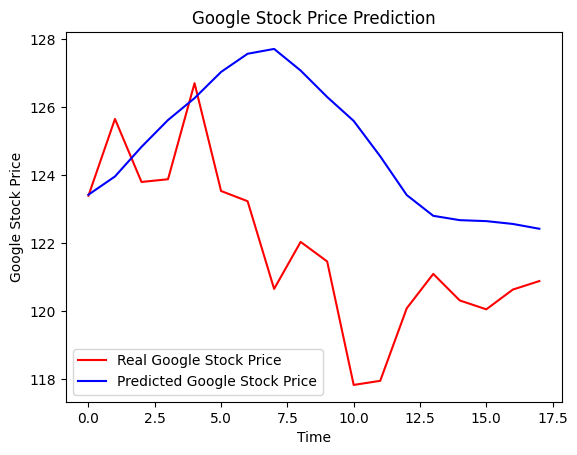

In [44]:
plt.plot(real_stock, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()